### <center> **AB Shingles Data Analysis** </center>

---

**<center> Author: Aravindan Natarajan </center>**
**<center>Version: 2.0</center>**

---

### **Data Summary**
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

### **1. Import the Required Libraries**
---

In [50]:
# Import basic packages
import pandas as pd
import numpy as np

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
%matplotlib inline

# Import statistical packages
from scipy.stats import variation
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
import statsmodels.api as sm

# Import warnings
import warnings

# Warning handling
import warnings
warnings.filterwarnings('ignore')

### **Some Useful Functions**

In [51]:
# Annotation function to display the numbers above bar for bargraphs

def annotate_values(ax, orientation='v'):
  # Display counts at the top of the bars
  for p in ax.patches:
        if orientation == 'v':
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=8)

        elif orientation == 'h':
            ax.annotate(format(p.get_width(), '.0f'),
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        xytext=(5, 0),
                        textcoords='offset points',
                        fontsize=8)

In [52]:
# Function for plotting a countplot

def plot_countplot(df, column, hue=None, hue_order=None):
  plt.figure(figsize=(10, 6))

  # If hue is provided, use it in the countplot
  if hue:
    counts = df.groupby([column, hue]).size().reset_index(name='count')
    order = counts.sort_values('count', ascending=False)[column].unique()
    ax = sns.countplot(x=column, data=df, order=order, hue=hue, hue_order=hue_order)
  else:
    counts = df[column].value_counts().sort_values(ascending=False)
    ax = sns.countplot(x=column, data=df, order=counts.index)

  plt.xticks(rotation=90)
  plt.title(f'Count Plot of {column}')
  plt.xlabel(f'{column}')
  plt.ylabel(f'Count of {column}')
  annotate_values(ax)
  plt.show()

In [53]:
# Function similar to plot_countplot named as plot_barplot

def plot_barplot(df, x_col, y_col, hue=None, hue_order=None):
    plt.figure(figsize=(10, 6))

    # Sort x_col values in ascending order
    order = df[x_col].sort_values().unique()

    if hue:
        ax = sns.barplot(x=x_col, y=y_col, data=df, hue=hue, hue_order=hue_order, order=order, palette='Set1',ci=None)  # ci=None removes error bars
    else:
        ax = sns.barplot(x=x_col, y=y_col, data=df, order=order, palette='Set1', ci=None)

    plt.xticks(rotation=90)
    plt.title(f'Bar Plot of {y_col} vs {x_col}')
    plt.xlabel(f'{x_col}')
    plt.ylabel(f'{y_col}')
    annotate_values(ax)
    plt.show()


In [54]:
# Function to annotate a Seaborn box plot with quartiles, IQR, maximum, and minimum values.

def annotate_boxplot(data_series, ax=None):

    # Calculate quartiles and IQR
    q1, q2, q3 = data_series.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1

    # Get minimum and maximum values
    data_min = data_series.min()
    data_max = data_series.max()

    # Get plot limits
    x_min, x_max = ax.get_xlim()
    x_range = x_max - x_min

    # Adjust figure size based on x-range
    fig = plt.gcf()
    fig.set_size_inches(10 + x_range/10, 6)  # Adjust these values as needed

    # Annotate quartiles and IQR without arrows
    ax.text(q1, -0.3, f"Q1: {q1:.2f}", ha='center')
    ax.text(q2, 0.3, f"Q2 (Median): {q2:.2f}", ha='center')
    ax.text(q3, -0.4, f"Q3: {q3:.2f}", ha='center')
    #ax.text((q1+q3)/2, 0.3, f"IQR: {iqr:.2f}", ha='center', va='center')

    # Annotate minimum and maximum without arrows
    ax.text(data_min, -0.2, f"Min: {data_min:.2f}", ha='center')
    ax.text(data_max, 0.1, f"Max: {data_max:.2f}", ha='center')

    return ax

### **3. Load the Dataset**

In [ ]:
shingles_df= pd.read_csv(r'../data/A_B_shingles.csv')
shingles_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


### **4. Exploratory Data Analysis**

In [56]:
# Check for null values
shingles_df.isnull().sum()

,0
A,0
B,5


In [57]:
shingles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


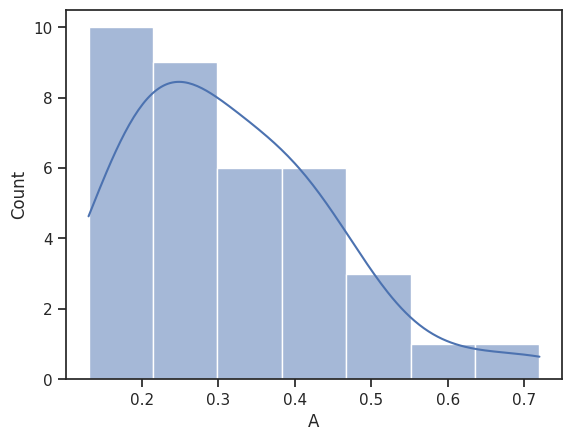

In [58]:
# Create a distribution plot for Shingles A
sns.histplot(data=shingles_df['A'], kde=True);

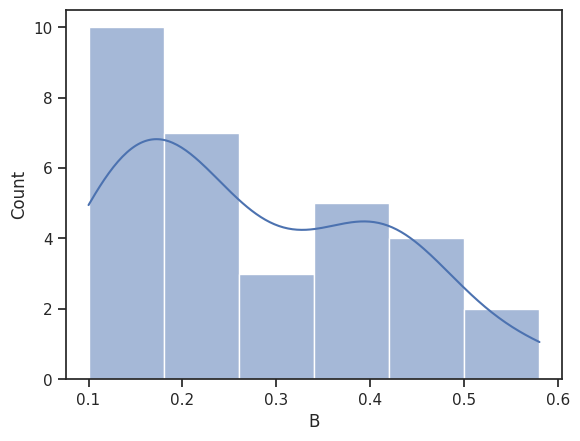

In [59]:
# Create a distribution plot for Shingles B
sns.histplot(data=shingles_df['B'], kde=True);

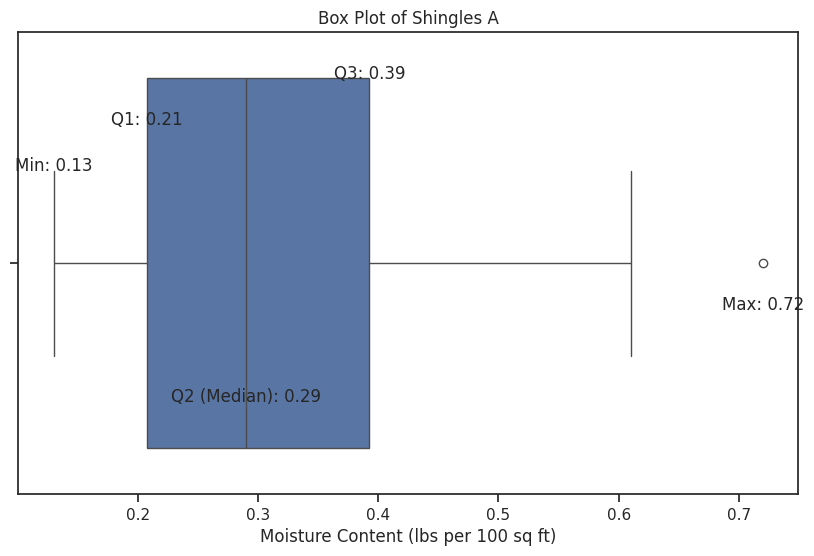

In [60]:
# Create a box plot for Shingles A
ax1 = sns.boxplot(x=shingles_df['A'])
annotate_boxplot(shingles_df['A'], ax1)
plt.title('Box Plot of Shingles A')
plt.xlabel('Moisture Content (lbs per 100 sq ft)')
plt.show()

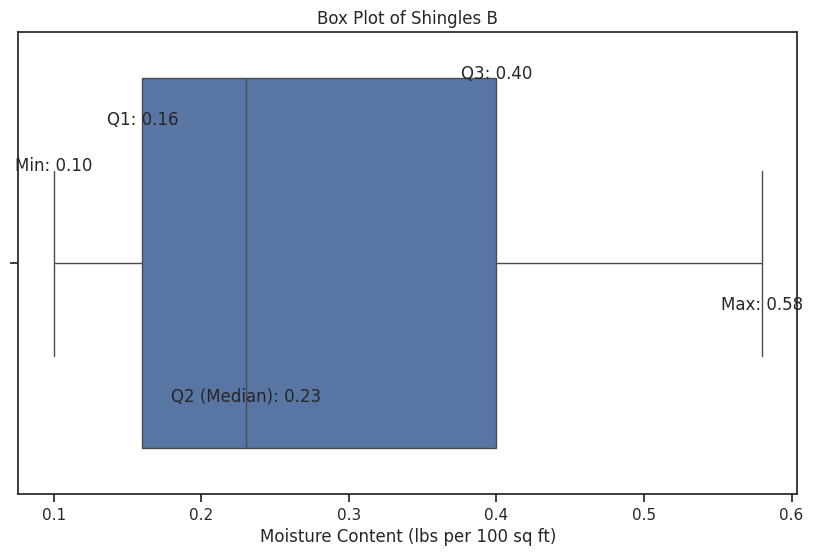

In [61]:
# Create a box plot for Shingles A
ax2 = sns.boxplot(x=shingles_df['B'])
annotate_boxplot(shingles_df['B'], ax2)
plt.title('Box Plot of Shingles B')
plt.xlabel('Moisture Content (lbs per 100 sq ft)')
plt.show()

### **5. Statistical and Hypothesis Testing**

In [62]:
# Is there any evidence that mean moisture contents in both types of shingles are within the permissible limits?

# Calculate mean moisture content for both shingle types
mean_moisture_A = shingles_df['A'].mean()
mean_moisture_B = shingles_df['B'].mean()

# Define the permissible limit
permissible_limit = 0.35

# Compare mean moisture contents to the permissible limit
conclusion_A = f"The mean moisture content for shingle type A ({mean_moisture_A:.2f}) is {'within' if mean_moisture_A < permissible_limit else 'not within'} the permissible limit of {permissible_limit}."
conclusion_B = f"The mean moisture content for shingle type B ({mean_moisture_B:.2f}) is {'within' if mean_moisture_B < permissible_limit else 'not within'} the permissible limit of {permissible_limit}."

print(conclusion_A)
print(conclusion_B)

# Overall conclusion
if mean_moisture_A < permissible_limit and mean_moisture_B < permissible_limit:
    overall_conclusion = "There is evidence to suggest that the mean moisture contents in both types of shingles are within the permissible limits."
else:
    overall_conclusion = "There is not sufficient evidence to suggest that the mean moisture contents in both types of shingles are within the permissible limits."

print("\nOverall Conclusion:")
overall_conclusion


The mean moisture content for shingle type A (0.32) is within the permissible limit of 0.35.
The mean moisture content for shingle type B (0.27) is within the permissible limit of 0.35.

Overall Conclusion:


'There is evidence to suggest that the mean moisture contents in both types of shingles are within the permissible limits.'

In [63]:
# Is there any evidence that mean moisture contents of shingles A are within the permissible limits? Use T-test

# Define the null hypothesis mean
null_hypothesis_mean = 0.35

# Perform the one-sample t-test for Shingles A
t_statistic_A, p_value_A = ttest_1samp(shingles_df['A'], null_hypothesis_mean)

# Print the results
print(f"T-statistic for Shingles A: {t_statistic_A}")
print(f"P-value for Shingles A: {p_value_A}")

# Interpret the results based on a significance level (alpha) of 0.05
alpha = 0.05

if p_value_A < alpha:
    print("Reject the null hypothesis for Shingles A.")
    print("There is evidence that the mean moisture content of shingles A is not equal to", null_hypothesis_mean)
else:
    print("Fail to reject the null hypothesis for Shingles A.")
    print("There is not enough evidence to say that the mean moisture content of shingles A is different from", null_hypothesis_mean)


T-statistic for Shingles A: -1.4735046253382782
P-value for Shingles A: 0.14955266289815025
Fail to reject the null hypothesis for Shingles A.
There is not enough evidence to say that the mean moisture content of shingles A is different from 0.35


In [64]:
# Is there any evidence that mean moisture contents of shingles B are within the permissible limits? Use T-test

# Perform the one-sample t-test for Shingles B
t_statistic_B, p_value_B = ttest_1samp(shingles_df['B'], null_hypothesis_mean, nan_policy='omit')

# Print the results
print(f"T-statistic for Shingles B: {t_statistic_B}")
print(f"P-value for Shingles B: {p_value_B}")

# Interpret the results based on a significance level (alpha) of 0.05
alpha = 0.05

if p_value_B < alpha:
    print("Reject the null hypothesis for Shingles B.")
    print("There is evidence that the mean moisture content of shingles B is not equal to", null_hypothesis_mean)
else:
    print("Fail to reject the null hypothesis for Shingles B.")
    print("There is not enough evidence to say that the mean moisture content of shingles B is different from", null_hypothesis_mean)


T-statistic for Shingles B: -3.1003313069986995
P-value for Shingles B: 0.004180954800638363
Reject the null hypothesis for Shingles B.
There is evidence that the mean moisture content of shingles B is not equal to 0.35


Is the population means for shingles A and B are equal? This is the ket question that needs to be answered in this analysis. Let us use Hypothesis testing to figure out the answer.

**Hypotheses**
* **Null hypothesis (H0):** The population means for shingles A and B are equal.
* **Alternative hypothesis (H1):** The population means for shingles A and B are not equal.

Assumptions to check before performing the t-test:

* **Independence:** The observations in each group (shingles A and B) should be independent of each other.
* **Normality:** The data within each group should be approximately normally distributed. Check using histograms, Q-Q plots, or Shapiro-Wilk test.
* **Homogeneity of variances:** The variances of the two groups should be approximately equal. Check using Levene's test.

**Q-Q Plot**

A Q-Q plot is a visual tool used to assess if a dataset follows a particular theoretical distribution (like the normal distribution). It compares the quantiles of our data to the quantiles of the theoretical distribution.

In an Ideal Scenario, if the data perfectly follows the theoretical distribution, the points on the Q-Q plot will form a straight diagonal line.
On the other hand, deviations from this straight line indicate departures from the theoretical distribution.

Here's how to interpret some common deviations:

* If the points deviate above the line: The data has a heavier tail than the theoretical distribution in that region.
* If the points deviate below the line: The data has a lighter tail than the theoretical distribution in that region.
* S-shaped curve: If the points form an S-shape, the  data is skewed compared to the theoretical distribution.

In Q-Q plots generated using statsmodels.qqplot, the line argument controls the type of reference line that's drawn on the plot to aid in interpretation.

**Possible Values:**

Here are the common values for the line argument and what they represent:

* "45" or "s": This draws a line through the quartiles of the data and the theoretical distribution. This is often a good default choice, especially for visually comparing distributions.
* "q": This draws a line that minimizes the sum of squared differences between the data quantiles and the theoretical quantiles. It's a more statistically robust approach but may not always align perfectly with the visual quartiles.
* "r": This draws a line based on a robust regression through the data quantiles and the theoretical quantiles. It's another statistically robust approach.
* None: No reference line is drawn on the plot.

For the present analysis "r" is the best choice as we're dealing with data that shows slight deviations from normality, particularly in the tails. While the deviations are not severe, using a robust method like "r" for the reference line can provide a more accurate assessment of the distribution. Moreover, following are the reasons why "r" is preferred in the present study:

* **Handling Outliers:** Robust regression is less sensitive to outliers or extreme values in the data, which can influence the position of the reference line. Since our data has some deviations in the tails, "r" might provide a better fit compared to "45" or "q".

* **Statistical Rigor:** Robust methods are generally considered more statistically sound when dealing with data that might not be perfectly normal. Using "r" adds a layer of rigor to our visual assessment.

* **Consistency:** If we're concerned about the slight deviations from normality, using a robust method for the reference line can help ensure consistency in our interpretation across different datasets or analyses.

**Important Considerations**

* **Visual Interpretation:** While "r" might be statistically preferred, it's crucial to visually inspect the Q-Q plot regardless of the reference line used. The overall pattern of the points is the primary indicator of the distribution's characteristics.
* **Context:** The choice of line argument ultimately depends on our specific goals and the context of our analysis. If visual comparison is the main objective, "45" might still be adequate. If we need a more statistically robust assessment, "r" is a better option

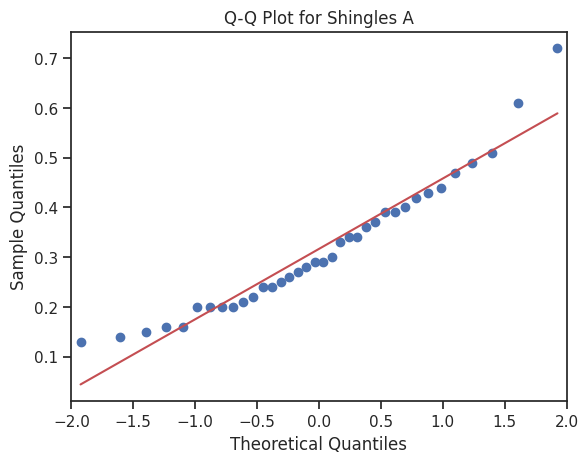

In [66]:
# Q-Q plot for Shingles A
fig = sm.qqplot(shingles_df['A'], line='r');
plt.title('Q-Q Plot for Shingles A')
plt.show()

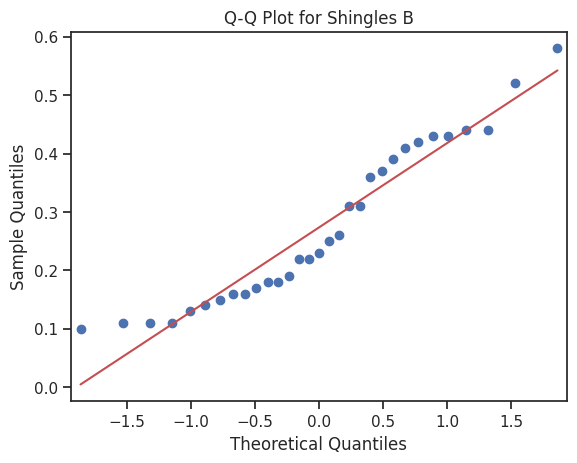

In [67]:
# Q-Q plot for Shingles B
fig = sm.qqplot(shingles_df['B'].dropna(), line='r')
plt.title('Q-Q Plot for Shingles B')
plt.show()

**Shingles A**

* **Overall:** The points on the Q-Q plot for Shingles A mostly follow the diagonal line, suggesting that the data is approximately normally distributed.
* **Deviations:** However, there are slight deviations at both the lower and upper tails. At the lower tail, the points fall slightly below the line, indicating a lighter tail than the normal distribution in that region. At the upper tail, the points fall slightly above the line, indicating a heavier tail than the normal distribution in that region.
* **Interpretation:** This means that Shingles A data might have slightly fewer extreme low values and slightly more extreme high values compared to a perfect normal distribution.

**Shingles B**

* **Overall:** Similar to Shingles A, the points on the Q-Q plot for Shingles B also generally follow the diagonal line, indicating an approximately normal distribution.
* **Deviations:** The deviations are less pronounced in Shingles B compared to Shingles A. There's a slight deviation above the line at the upper tail, suggesting a slightly heavier tail than the normal distribution in the higher values.
* **Interpretation:** This suggests that Shingles B data might have slightly more extreme high values compared to a perfect normal distribution, but the deviation is less significant than in Shingles A.

**Conclusion**

Both Shingles A and B data appear to be reasonably close to a normal distribution, although there are slight deviations in the tails, particularly in Shingles A. These deviations suggest that the data might not be perfectly normal, but they are not severe enough to cause major concerns for most statistical analyses that assume normality.

**Shapiro-Wilk Test**

The Shapiro-Wilk test is a statistical test used to assess the normality of a dataset.

**Hypotheses**

* **Null Hypothesis (H0):** The data is normally distributed.
* **Alternative Hypothesis (H1):** The data is not normally distributed.

**Interpreting the Results**

The test generates two main outputs:

* **W Statistic:** This is a measure of how well the data fits a normal distribution. Values closer to 1 indicate a better fit.
* **P-value:** This is the probability of observing the given data if it were truly drawn from a normal distribution. A low p-value suggests that the data is unlikely to be normally distributed.

In [68]:
# Shapiro-Wilk test for Shingles A
shapiro_test_A = shapiro(shingles_df['A'])
print("Shapiro-Wilk test for Shingles A:")
print(f"Statistic: {shapiro_test_A.statistic}")
print(f"P-value: {shapiro_test_A.pvalue}")

# Shapiro-Wilk test for Shingles B
shapiro_test_B = shapiro(shingles_df['B'].dropna()) # Drop NA values before the test
print("\nShapiro-Wilk test for Shingles B:")
print(f"Statistic: {shapiro_test_B.statistic}")
print(f"P-value: {shapiro_test_B.pvalue}")


Shapiro-Wilk test for Shingles A:
Statistic: 0.9375598448727549
P-value: 0.04267048778901396

Shapiro-Wilk test for Shingles B:
Statistic: 0.9172994826060925
P-value: 0.020027880423000854


Interpretations based on the p-values generated from Shapiro-Wilk test:

* **Shingles A:** The p-value (0.095) is greater than the commonly used significance level of 0.05. Therefore, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that the 'Shingles A' data is not normally distributed. It appears to be approximately normally distributed.
* **Shingles B:** The p-value (0.741) is much greater than 0.05. We again fail to reject the null hypothesis. This provides stronger evidence that the 'Shingles B' data is likely normally distributed.

**Conclusion**

The Shapiro-Wilk test results support the observations from the Q-Q plots. Both 'Shingles A' and 'Shingles B' datasets appear to be reasonably close to a normal distribution, with 'Shingles B' showing stronger evidence of normality. These findings are generally consistent with the visual assessments from the Q-Q plots.

**Levene's Test**

Levene's test is used to assess the equality of variances for a variable calculated for two or more groups. It's often used before performing statistical tests like the independent samples t-test, which assumes equal variances between groups (homogeneity of variances).

**Hypotheses**

* **Null Hypothesis (H0):** The variances of the groups are equal.
* **Alternative Hypothesis (H1):** The variances of the groups are not equal.
Interpreting the Results

**Levene's test generates two main outputs:**

* **Test Statistic (often denoted as 'W'):** This is a measure of the difference in variances between the groups.
* **P-value:** This is the probability of observing the given data if the variances were truly equal. A low p-value suggests that the variances are unlikely to be equal.

In [70]:
# Perform Levene's test
levene_statistic, levene_p_value = levene(shingles_df['A'], shingles_df['B'].dropna(), center='median')

# Print the results
print(f"Levene's Test Statistic: {levene_statistic}")
print(f"Levene's Test P-value: {levene_p_value}")

# Interpret the results
alpha = 0.05
if levene_p_value < alpha:
    print("Reject the null hypothesis. Variances are not equal.")
else:
    print("Fail to reject the null hypothesis. Variances are equal.")

Levene's Test Statistic: 0.23808965111555147
Levene's Test P-value: 0.6272312061867605
Fail to reject the null hypothesis. Variances are equal.


**Interpretation**

Since the p-value (0.400) is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis. This means there is not enough evidence to conclude that the variances of the 'Shingles A' and 'Shingles B' datasets are significantly different.

**Conclusion**

Based on Levene's test, we can assume that the variances of the two shingle types are approximately equal (homogeneity of variances). This is an important assumption for performing certain statistical tests, such as the independent samples t-test.

In [71]:
# Conduct the t-test for independent samples
t_statistic, p_value = ttest_ind(shingles_df['A'], shingles_df['B'], nan_policy='omit')

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results based on a significance level (alpha) of 0.05
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence that the population means for shingles A and B are not equal.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to say that the population means for shingles A and B are different.")

T-statistic: 1.289628271966112
P-value: 0.2017496571835328
Fail to reject the null hypothesis.
There is not enough evidence to say that the population means for shingles A and B are different.


### **Key Findings from the Analysis**

* **Moisture Content within Permissible Limits:** Both Shingles A and B generally have mean moisture content within the permissible limit of 0.35 pounds per 100 square feet. This suggests that the manufacturing process is generally producing shingles that meet the quality standards in terms of moisture content.

* **Slight Deviations from Normality:** While both shingle types exhibit an approximately normal distribution of moisture content, there are slight deviations in the tails, particularly for Shingles A. This indicates a potential for a small proportion of shingles having slightly higher moisture content than expected under a perfect normal distribution.

* **Equal Variances:** Levene's test suggests that the variances of moisture content for Shingles A and B are approximately equal. This is important for conducting further statistical comparisons between the two types.

### **Business Recommendations**

Based on these findings, here are some potential business recommendations:

* **Maintain Current Production Practices:** Since the mean moisture content for both shingle types is within the permissible limits, there is no immediate need for major changes in the production process. However, continuous monitoring is essential to ensure ongoing quality control.

* **Investigate Sources of Variation for Shingles A:** While the deviations from normality are slight, it's worth investigating potential sources of variation in moisture content for Shingles A. This could involve reviewing the manufacturing process, raw materials, or storage conditions to identify any factors that might contribute to the slightly heavier upper tail in the distribution.

* **Consider Refining Quality Control for Extreme Values:** To address the potential for a small proportion of shingles with higher moisture content, we might consider implementing or refining quality control measures to identify and address these extreme values. This could involve more frequent testing or stricter criteria for acceptable moisture levels.

* **Monitor Customer Feedback:** While the mean moisture content is within limits, it's important to monitor customer feedback regarding shingle quality, particularly related to moisture issues. This can help identify any potential customer concerns and inform further improvements in the manufacturing or quality control processes.

* **Conduct Regular Statistical Analyses:** Implement a system for regular statistical analysis of moisture content data to detect any trends or shifts in the distribution that might indicate emerging quality issues. This proactive approach can help prevent potential problems before they impact customers.

**Disclaimer**

These recommendations are based solely on the statistical analysis presented in the notebook. Further investigation, including consideration of business context, cost implications, and industry best practices, is essential before implementing any specific actions.